In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls /content/drive/MyDrive/MLDataSets


diamonds.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score

In [7]:
diamond_df= pd.read_csv('/content/drive/MyDrive/MLDataSets/diamonds.csv')
diamond_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
diamond_df.drop(['Unnamed: 0'],axis=1,inplace=True)
diamond_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [9]:
diamond_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [10]:
diamond_df.shape

(53940, 10)

In [11]:
diamond_df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [12]:
diamond_df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [13]:
diamond_df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [14]:
!pip install ydata-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.3/352.3 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 47.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 85.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=06731859e8c5bc1ef56aec8f161cbba3dbaece645519c81a9e441ac2da88cc4e
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    

In [15]:
from ydata_profiling import ProfileReport
profile=ProfileReport(diamond_df,title="profiling Report")

In [16]:
profile.to_notebook_iframe()

Output hidden; open in https://colab.research.google.com to view.

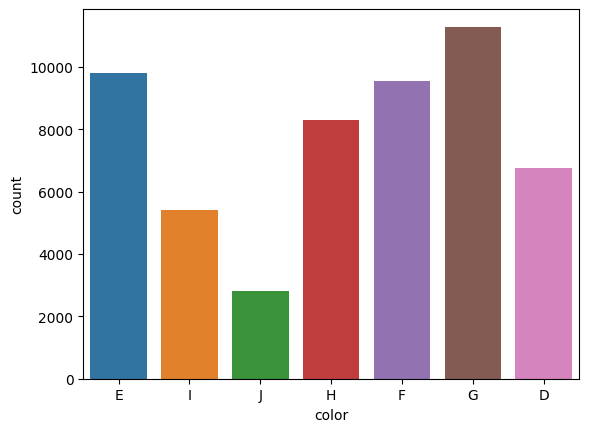

In [17]:
sns.countplot(data=diamond_df,x='color')
plt.show()

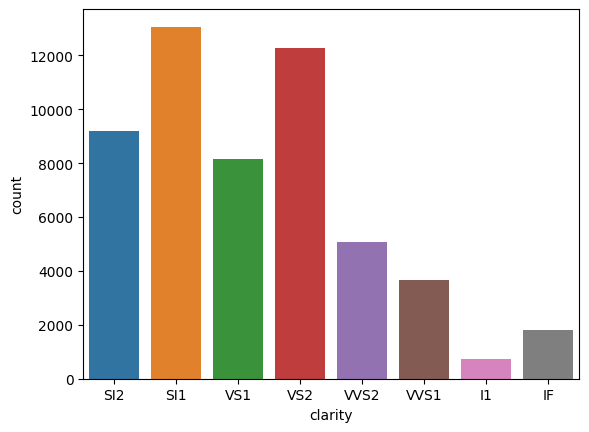

In [18]:
sns.countplot(data=diamond_df,x='clarity')
plt.show()

In [19]:
ab=list(diamond_df['cut'].unique())
ab

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']

In [20]:
cut_mapping= {'Fair':0,'Good':1,'Very Good':2,'Premium':3,'Ideal':4}
diamond_df.cut=diamond_df.cut.map(cut_mapping)
diamond_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [21]:
list(diamond_df.color.unique())

['E', 'I', 'J', 'H', 'F', 'G', 'D']

In [22]:
color_mapping={'J':0,'I':1,'H':2, 'G':3,'F':4,'E':5,'D':6}
diamond_df.color=diamond_df.color.map(color_mapping)

In [23]:
list(diamond_df['clarity'].unique())

['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']

In [24]:
calrity_mapping={'I1':0,'SI2':1,'SI1':2,'VS2':3,'VS1':4,'VVS2':5,'VVS1':6}
diamond_df.clarity=diamond_df.clarity.map(calrity_mapping)

In [25]:
diamond_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5,1.0,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5,2.0,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,5,4.0,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,1,3.0,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,0,1.0,63.3,58.0,335,4.34,4.35,2.75


In [26]:
diamond_df[diamond_df["x"]==0].index

Int64Index([11182, 11963, 15951, 24520, 26243, 27429, 49556, 49557], dtype='int64')

In [27]:
diamond_df=diamond_df.drop(diamond_df[diamond_df["x"]==0].index)
diamond_df=diamond_df.drop(diamond_df[diamond_df["y"]==0].index)
diamond_df=diamond_df.drop(diamond_df[diamond_df["z"]==0].index)






In [28]:
diamond_df=diamond_df[diamond_df['depth']<diamond_df['depth'].quantile(0.99)]
diamond_df=diamond_df[diamond_df['table']<diamond_df['table'].quantile(0.99)]
diamond_df=diamond_df[diamond_df['x']<diamond_df['x'].quantile(0.99)]
diamond_df=diamond_df[diamond_df['y']<diamond_df['y'].quantile(0.99)]
diamond_df=diamond_df[diamond_df['z']<diamond_df['z'].quantile(0.99)]

In [29]:
diamond_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51130 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    51130 non-null  float64
 1   cut      51130 non-null  int64  
 2   color    51130 non-null  int64  
 3   clarity  49349 non-null  float64
 4   depth    51130 non-null  float64
 5   table    51130 non-null  float64
 6   price    51130 non-null  int64  
 7   x        51130 non-null  float64
 8   y        51130 non-null  float64
 9   z        51130 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 4.3 MB


In [30]:
model_df=diamond_df.copy()

In [31]:
X=model_df.drop(['price'],axis=1)
y=model_df['price']


In [32]:
X.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [33]:
y.head()

0    326
1    326
3    334
4    335
5    336
Name: price, dtype: int64

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [35]:
X_train.shape

(40904, 9)

In [36]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((40904, 9), (10226, 9), (40904,), (10226,))

In [37]:
'''xgb1 = XGBRegressor()
parameters = {
              'objective':['reg:squarederror'],
              'learning_rate': [.0001, 0.001, .01],
              'max_depth': [3, 5, 7],
              'min_child_weight': [3,5,7],
              'subsample': [0.1,0.5,1.0],
              'colsample_bytree': [0.1, 0.5, 1.0],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 3,
                        n_jobs = -1,
                        verbose=0)'''

In [38]:
'''xgb1 = XGBRegressor()
parameters = {
              'objective':['reg:squarederror'],
              'learning_rate': [.0001, 0.001, .01],
              'max_depth': [3, 5, 7],
              'min_child_weight': [3,5,7],
              'subsample': [0.1,0.5,1.0],
              'colsample_bytree': [0.1, 0.5, 1.0],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 3,
                        n_jobs = -1,
                        verbose=10)'''

In [48]:
xgb1 = XGBRegressor()

history = xgb1.fit(X_train,y_train,verbose=True)

print("MAE:", mean_absolute_error(y_test, xgb1.predict(X_test)))
print("MSE:", mean_squared_error(y_test, xgb1.predict(X_test)))

MAE: 233.71674877982213
MSE: 191497.0070565603


In [49]:
xgb1.save_model('xgb_model.json')

In [50]:
!pip install joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [51]:
import joblib
# save the model to a file
joblib.dump(xgb1, 'xgb_grid.joblib')

['xgb_grid.joblib']

In [52]:
from google.colab import files
files.download('xgb_grid.joblib') 
files.download('xgb_model.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [40]:
'''xgb_grid.fit(X_train,y_train)'''

Fitting 3 folds for each of 243 candidates, totalling 729 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.1, 0.5, 1.0],
                         'learning_rate': [0.0001, 0.001, 0.01],
                         'max_depth': [3, 5, 7], 'min_child_weight': [3, 5, 7],
                         'n_estimators': [500],
                         'objective': ['reg:squarederror'],
                         'subsample': [0.1, 0.5, 1.0]},
             verbose=1)

In [53]:
#print("MSE:", mean_squared_error(y_test, xgb_grid.predict(X_test)))
#print("MAE:", mean_absolute_error(y_test, xgb_grid.predict(X_test)))
#print("R2:", r2_score(y_test, xgb_grid.predict(X_test)))